In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DEBT_control_class import DEBT_Control_Protocol

In [2]:
params = dict()
params["custom"] = True
params["capacity_matrix"] = np.array([[0, 100, 100], [100, 0, 100], [100, 100, 0]])
params["price_update_step_size"] = 0.01

In [3]:
params["custom_routes"] = True
paths = dict()
empty_path = np.zeros((3, 3))
paths[(0,1)] = [empty_path.copy(), empty_path.copy()]
paths[(0,1)][0][0,1] = 1
paths[(0,1)][1][0,2] = 1
paths[(0,1)][1][2,1] = 1
paths[(1,2)] = [empty_path.copy(), empty_path.copy()]
paths[(1,2)][0][1,2] = 1
paths[(1,2)][1][1,0] = 1
paths[(1,2)][1][0,2] = 1
paths[(2,0)] = [empty_path.copy(), empty_path.copy()]
paths[(2,0)][0][2,0] = 1
paths[(2,0)][1][2,1] = 1
paths[(2,0)][1][1,0] = 1
params["routes"] = paths


In [4]:
demand_params = dict()
demand_params["custom"] = True
demand_params["demand_matrix"] = np.array([[0, 10, 0], [0, 0, 10], [10, 0, 0]])
random_demand_params = dict()
random_demand_params["distribution"] = "deterministic"
demand_params["random"] = random_demand_params
price_threshold = (3.0, 3.3)
myPCN = DEBT_Control_Protocol(params, demand_params, price_threshold)

Demand Matrix:
[[ 0 10  0]
 [ 0  0 10]
 [10  0  0]]


In [5]:
T = 100
n = 0
if params["custom"]:
    n = len(params["capacity_matrix"])
else:
    n = params["num_vertices"]

In [6]:
# create arrays to store flows and prices
flows_data = dict()
path_price_data = dict()
for i in range(n):
    for j in range(n):
        if (i,j) not in myPCN.paths.keys():
            continue
        flows_data[(i,j)] = np.zeros((T,len(myPCN.paths[(i,j)])))
        path_price_data[(i,j)] = np.zeros((T,len(myPCN.paths[(i,j)])))
edge_price_data = np.zeros((T, n, n))
reset_data = np.zeros((T, n, n))

In [7]:
for t in range(T):
    myPCN.loop()
    edge_price_data[t] = myPCN.link_prices.copy()
    for key in flows_data.keys():
        flows_data[key][t] = myPCN.flow_requests[key]
        path_price_data[key][t] = myPCN.path_prices[key]
        reset_data[t] = myPCN.channels_reset


0 1
1 2
2 0


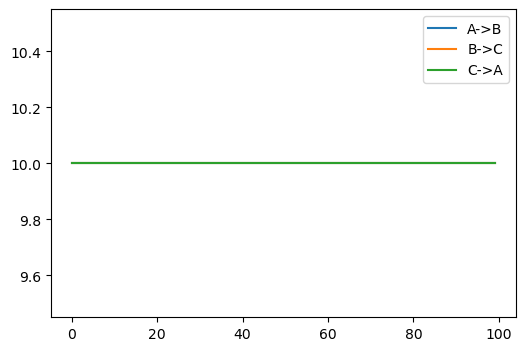

In [8]:
alphabets = ['A', 'B', 'C', 'D', 'E', 'F']
plt.close("all")
plt.figure(figsize=(6,4))
for i in range(n):
    for j in range(n):
        if myPCN.demands[i,j] > 0:
            print(i,j)
            plt.plot(np.sum(flows_data[(i,j)], axis=1), label = alphabets[i] + " ->" + alphabets[j])
            # plt.plot(total_average(np.sum(flows_data[(i,j)], axis=1)), label = str(i) + "->" + str(j) + "flow; demand "+str(myPCN.demands[i,j]))
            # plt.plot(np.sum(flows_data[(i,j)], axis=1), label = alphabets[i] + "->" + alphabets[j])
# plt.plot(flows_data[(0,1)][:,0], label = "short path", marker = 's', linestyle='none')
plt.legend()

In [9]:
path_price_data[(1,2)]

array([[ 0.        ,  0.        ],
       [-0.05      ,  0.1       ],
       [-0.08877105,  0.17754209],
       [-0.11891478,  0.23782955],
       [-0.14243915,  0.28487829],
       [-0.16086927,  0.32173854],
       [-0.17536023,  0.35072045],
       [-0.18678967,  0.37357934],
       [-0.19582829,  0.39165659],
       [-0.20299194,  0.40598387],
       [-0.2086798 ,  0.41735959],
       [-0.21320254,  0.42640507],
       [-0.21680311,  0.43360622],
       [-0.2196723 ,  0.4393446 ],
       [-0.22196045,  0.44392089],
       [-0.22378635,  0.44757271],
       [-0.22524413,  0.45048826],
       [-0.22640847,  0.45281693],
       [-0.22733873,  0.45467746],
       [-0.22808217,  0.45616433],
       [-0.22867642,  0.45735285],
       [-0.22915151,  0.45830302],
       [-0.22953138,  0.45906276],
       [-0.22983515,  0.45967029],
       [-0.23007808,  0.46015615],
       [-0.23027237,  0.46054474],
       [-0.23042777,  0.46085553],
       [-0.23055206,  0.46110413],
       [-0.23065149,